## Solution steps:

1. Load data
2. Understand your data: EDA
3. Pre-process the data
4. Prepare train and test datasets
5. Choose a model
6. Train your model
7. Evaluate the model (F1-score calculation)
8. Optimize: repeat steps 5 - 7

### Load Libraries

In [1]:
import pandas as pd   # package for data analysis
import numpy as np    # package for numerical computations

# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# For Preprocessing, ML models and Evaluation
from sklearn.model_selection import train_test_split   # To split the dataset into train and test set

from sklearn.linear_model import LogisticRegression     # Logistic regression model

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder    # for converting categorical to numerical

from sklearn.metrics import f1_score    # for model evaluation

In [2]:
### Load data
data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')
data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [4]:
data.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,23097.000000
mean,16545.712041,26.413127,6261.280772,33.209768,23.454820,0.897905,0.136355,0.185070,0.083615,0.393239,0.053700,0.000595,1.750480,0.632247
std,9532.263503,15.030865,3595.990620,19.549882,3.807661,0.302780,0.343173,0.388363,0.276817,0.488480,0.225431,0.024379,0.770311,0.482204
min,2.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8280.000000,13.000000,3181.000000,16.000000,20.205550,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16597.000000,26.000000,6242.000000,33.000000,23.386199,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24825.000000,39.000000,9363.000000,50.000000,26.788154,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


In [5]:
data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

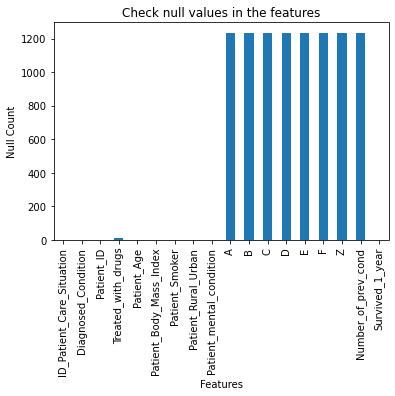

In [6]:
data.isnull().sum().plot(kind='bar')
plt.title('Check null values in the features')
plt.xlabel('Features')
plt.ylabel('Null Count')
plt.show()

In [7]:
# Filling the missing values

In [8]:
data['Treated_with_drugs'] = data['Treated_with_drugs'].fillna(data['Treated_with_drugs'].mode()[0])

In [9]:
data['A'].fillna(data['A'].mode()[0], inplace=True)
data['B'].fillna(data['B'].mode()[0], inplace=True)
data['C'].fillna(data['C'].mode()[0], inplace=True)
data['D'].fillna(data['D'].mode()[0], inplace=True)
data['E'].fillna(data['E'].mode()[0], inplace=True)
data['F'].fillna(data['F'].mode()[0], inplace=True)
data['Z'].fillna(data['Z'].mode()[0], inplace=True)

In [10]:
data['Number_of_prev_cond'] = data['Number_of_prev_cond'].fillna(data['Number_of_prev_cond'].mode()[0])  
# filling the missing value of 'Number_of_prev_cond'

In [11]:
data.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

In [12]:
## Relationship between Features and Survival

### Show the Survival count

In [13]:
data['Survived_1_year'].value_counts()

1    14603
0     8494
Name: Survived_1_year, dtype: int64

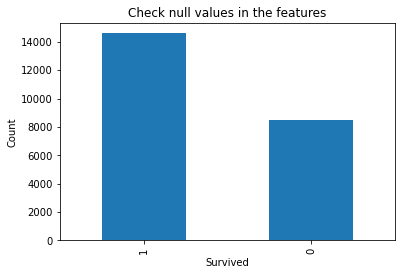

In [14]:
data['Survived_1_year'].value_counts().plot(kind='bar')
plt.title('Check null values in the features')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

In [15]:
# Columns name
data.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition',
       'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond',
       'Survived_1_year'],
      dtype='object')

In [16]:
### 1. Diagnosed_Condition vs Survival Count
data.Diagnosed_Condition.value_counts()

11    489
12    483
49    479
7     471
52    469
43    469
18    468
36    466
17    461
40    460
8     460
1     459
24    458
34    458
19    456
45    455
5     454
21    454
29    452
46    448
41    447
35    447
51    444
30    443
6     443
33    443
4     443
23    443
31    443
39    442
3     442
16    440
20    439
9     438
22    436
15    436
13    436
27    434
44    432
25    429
28    426
37    425
32    425
42    423
47    422
26    421
48    418
2     417
10    416
38    413
14    408
50    401
0      13
Name: Diagnosed_Condition, dtype: int64

In [17]:
Diagnosed_Condition_survived = data.groupby('Diagnosed_Condition').Survived_1_year.value_counts()
Diagnosed_Condition_survived

Diagnosed_Condition  Survived_1_year
0                    1                   13
1                    1                  334
                     0                  125
2                    1                  299
                     0                  118
                                       ... 
50                   0                  110
51                   1                  305
                     0                  139
52                   1                  308
                     0                  161
Name: Survived_1_year, Length: 105, dtype: int64

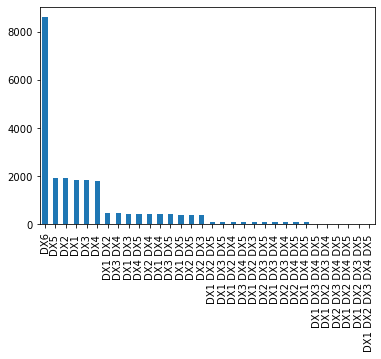

In [18]:
data.Treated_with_drugs.value_counts().plot(kind='bar', subplots=False)
plt.show()

In [19]:
Treated_with_drugs_survived = data.groupby('Treated_with_drugs').Survived_1_year.value_counts()
Treated_with_drugs_survived

Treated_with_drugs  Survived_1_year
DX1                 1                  1375
                    0                   460
DX1 DX2             1                   293
                    0                   155
DX1 DX2 DX3         1                    63
                                       ... 
DX4 DX5             0                    93
DX5                 1                  1558
                    0                   351
DX6                 0                  4943
                    1                  3676
Name: Survived_1_year, Length: 63, dtype: int64

In [20]:
#Treated_with_drugs_survived.unstack(level=0).plot(kind='bar', subplots=False)

In [21]:
data.Patient_Age.value_counts()

31     401
19     395
64     394
36     393
0      392
      ... 
115      1
149      1
123      1
121      1
132      1
Name: Patient_Age, Length: 78, dtype: int64

In [22]:
age_survived = data.groupby('Patient_Age').Survived_1_year.value_counts()
age_survived

Patient_Age  Survived_1_year
0            1                  216
             0                  176
1            1                  207
             0                  152
2            1                  217
                               ... 
128          1                    1
132          1                    1
138          1                    1
142          1                    2
149          1                    1
Name: Survived_1_year, Length: 145, dtype: int64

In [23]:
data.Patient_Body_Mass_Index.value_counts()

27.636765    9
28.697330    8
19.097499    8
28.548780    8
21.593501    8
            ..
20.543993    1
19.913554    1
25.496658    1
27.832044    1
18.123269    1
Name: Patient_Body_Mass_Index, Length: 10570, dtype: int64

In [24]:
bodymass_survived = data.groupby('Patient_Body_Mass_Index').Survived_1_year.value_counts()
bodymass_survived

Patient_Body_Mass_Index  Survived_1_year
1.089300                 1                  1
1.145000                 1                  1
1.258100                 1                  1
1.292500                 1                  1
1.348400                 1                  1
                                           ..
29.997877                0                  1
                         1                  1
29.998891                0                  2
29.999579                1                  2
                         0                  1
Name: Survived_1_year, Length: 13714, dtype: int64

In [25]:
data.Patient_Smoker.value_counts()

NO            13246
YES            9838
Cannot say       13
Name: Patient_Smoker, dtype: int64

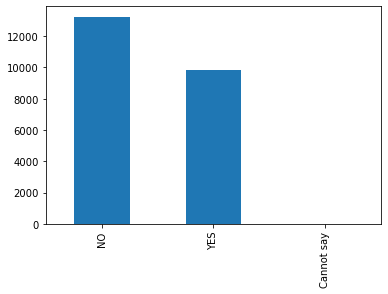

In [26]:
data.Patient_Smoker.value_counts().plot(kind='bar')

In [27]:
smoker_survived = data.groupby('Patient_Smoker').Survived_1_year.value_counts()
smoker_survived

Patient_Smoker  Survived_1_year
Cannot say      1                    13
NO              1                  9767
                0                  3479
YES             0                  5015
                1                  4823
Name: Survived_1_year, dtype: int64

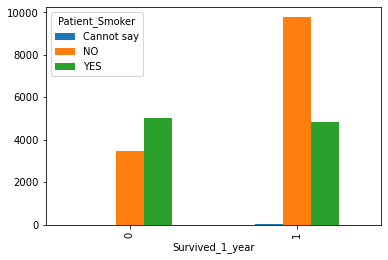

In [28]:
smoker_survived.unstack(level=0).plot(kind='bar', subplots=False)

In [29]:
data.Patient_Rural_Urban.value_counts()

RURAL    16134
URBAN     6963
Name: Patient_Rural_Urban, dtype: int64

In [30]:
Patient_Rural_Urban_survived = data.groupby('Patient_Smoker').Survived_1_year.value_counts()
Patient_Rural_Urban_survived

Patient_Smoker  Survived_1_year
Cannot say      1                    13
NO              1                  9767
                0                  3479
YES             0                  5015
                1                  4823
Name: Survived_1_year, dtype: int64

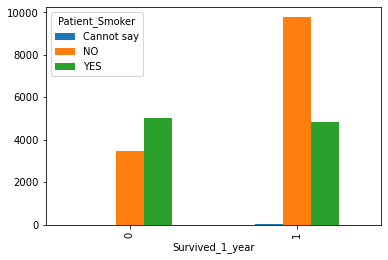

In [31]:
Patient_Rural_Urban_survived.unstack(level=0).plot(kind='bar', subplots=False)

In [32]:
data.Patient_mental_condition.value_counts()

Stable    23097
Name: Patient_mental_condition, dtype: int64

In [33]:
patient_mental_condition_survived = data.groupby('Patient_mental_condition').Survived_1_year.value_counts()
patient_mental_condition_survived

Patient_mental_condition  Survived_1_year
Stable                    1                  14603
                          0                   8494
Name: Survived_1_year, dtype: int64

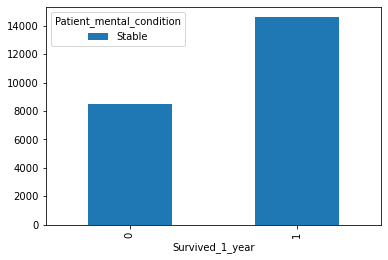

In [34]:
patient_mental_condition_survived.unstack(level=0).plot(kind='bar', subplots=False)

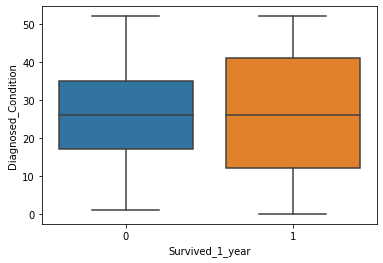

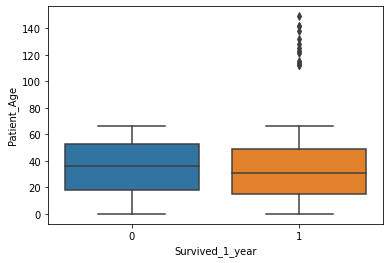

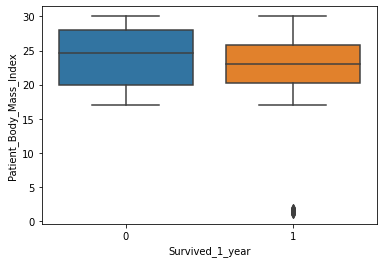

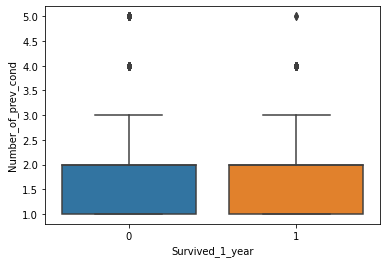

In [35]:
numeric_data=data[['Diagnosed_Condition', 'Patient_Age', 'Patient_Body_Mass_Index', 'Number_of_prev_cond']]
for feature in numeric_data.columns:
  sns.boxplot(x=data.Survived_1_year, y=feature, data=numeric_data)
  plt.show()

### Let's look at Categorical Data

In [36]:
categorical_data = data.drop(numeric_data.columns, axis=1)    # dropping the numerical columns from the dataframe 'data'
categorical_data.nunique()   # nunique() return you the number of unique values in each column/feature

ID_Patient_Care_Situation    23097
Patient_ID                   10570
Treated_with_drugs              32
Patient_Smoker                   3
Patient_Rural_Urban              2
Patient_mental_condition         1
A                                2
B                                2
C                                2
D                                2
E                                2
F                                2
Z                                2
Survived_1_year                  2
dtype: int64

In [38]:
data.Treated_with_drugs.value_counts()

DX6                     8619
DX5                     1909
DX2                     1904
DX1                     1835
DX3                     1830
DX4                     1792
DX1 DX2                  448
DX3 DX4                  448
DX1 DX3                  424
DX4 DX5                  423
DX2 DX4                  419
DX1 DX4                  408
DX3 DX5                  407
DX1 DX5                  402
DX2 DX5                  400
DX2 DX3                  398
DX1 DX2 DX5              103
DX1 DX3 DX5              101
DX1 DX2 DX4               99
DX3 DX4 DX5               96
DX1 DX2 DX3               95
DX2 DX3 DX5               91
DX1 DX3 DX4               90
DX2 DX3 DX4               87
DX2 DX4 DX5               84
DX1 DX4 DX5               80
DX1 DX3 DX4 DX5           24
DX1 DX2 DX3 DX4           24
DX2 DX3 DX4 DX5           22
DX1 DX2 DX4 DX5           18
DX1 DX2 DX3 DX5           14
DX1 DX2 DX3 DX4 DX5        3
Name: Treated_with_drugs, dtype: int64

So 'Treated_with_drugs' column has 32 unique values while 'Patient_Smoker' has only 3 categorical values. 'Patient_mental_condition' column has only 1 categorical value.

### Pre-Processing and Data Cleaning of Categorical Variables
We have discussed in our sessions that machine learning models accepts only numerical data. 'Treated_with_drugs' column is a categorical column and has values as combination of one or more drugs. Let's split all those combined drugs into individual drugs and create dummies for that.

In [39]:
drugs = data['Treated_with_drugs'].str.get_dummies(sep=' ') # split all the entries separated by space and create dummy variable
drugs.head()

,DX1,DX2,DX3,DX4,DX5,DX6
0,0,0,0,0,0,1
1,0,1,0,0,0,0
2,0,0,0,0,0,1
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [40]:
data = pd.concat([data, drugs], axis=1)     # concat the two dataframes 'drugs' and 'data'
data = data.drop('Treated_with_drugs', axis=1)    # dropping the column 'Treated_with_drugs' as its values are now splitted into different columns

data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,...,F,Z,Number_of_prev_cond,Survived_1_year,DX1,DX2,DX3,DX4,DX5,DX6
0,22374,8,3333,56,18.479385,YES,URBAN,Stable,1.0,0.0,...,0.0,0.0,2.0,0,0,0,0,0,0,1
1,18164,5,5740,36,22.945566,YES,RURAL,Stable,1.0,0.0,...,0.0,0.0,1.0,1,0,1,0,0,0,0
2,6283,23,10446,48,27.510027,YES,RURAL,Stable,1.0,0.0,...,0.0,0.0,1.0,0,0,0,0,0,0,1
3,5339,51,12011,5,19.130976,NO,URBAN,Stable,1.0,0.0,...,0.0,0.0,1.0,1,1,0,0,0,0,0
4,33012,0,12513,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,...,0.0,1.0,1.0,1,0,0,0,0,0,1


'Patient_Smoker' is also a categorical column and we need to create dummies for this too. If you observe the data, the column 'Patient_Smoker' has a category 'Cannot say'.

In [41]:
data.Patient_Smoker.value_counts()

NO            13246
YES            9838
Cannot say       13
Name: Patient_Smoker, dtype: int64

There can be different ways to deal with the category 'Cannot say'. Here we will consider it as missing value and fill those entries with the mode value of the column

In [43]:
data.Patient_Smoker[data['Patient_Smoker'] == "Cannot say"] = 'NO'    
# we already know 'NO' is the mode so directly changing the values 'Cannot say' to 'NO'

In [57]:
data = pd.get_dummies(data, columns=['Patient_Smoker', 'Patient_Rural_Urban'])

In [58]:
print(data.ID_Patient_Care_Situation.nunique())     # nunique() gives you the count of unique values in the column
print(data.Patient_ID.nunique())

AttributeError: 'DataFrame' object has no attribute 'ID_Patient_Care_Situation'

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diagnosed_Condition        23097 non-null  int64  
 1   Patient_ID                 23097 non-null  int64  
 2   Patient_Age                23097 non-null  int64  
 3   Patient_Body_Mass_Index    23097 non-null  float64
 4   A                          23097 non-null  float64
 5   B                          23097 non-null  float64
 6   C                          23097 non-null  float64
 7   D                          23097 non-null  float64
 8   E                          23097 non-null  float64
 9   F                          23097 non-null  float64
 10  Z                          23097 non-null  float64
 11  Number_of_prev_cond        23097 non-null  float64
 12  Survived_1_year            23097 non-null  int64  
 13  DX1                        23097 non-null  int

In [48]:
data.drop('ID_Patient_Care_Situation', axis=1, inplace=True)

The column 'Patient_mental_condition' has only one category 'stable'. So we can drop this column as for every observation the entry here is 'stable'.

In [49]:
data.drop('Patient_mental_condition', axis=1, inplace=True)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diagnosed_Condition        23097 non-null  int64  
 1   Patient_ID                 23097 non-null  int64  
 2   Patient_Age                23097 non-null  int64  
 3   Patient_Body_Mass_Index    23097 non-null  float64
 4   A                          23097 non-null  float64
 5   B                          23097 non-null  float64
 6   C                          23097 non-null  float64
 7   D                          23097 non-null  float64
 8   E                          23097 non-null  float64
 9   F                          23097 non-null  float64
 10  Z                          23097 non-null  float64
 11  Number_of_prev_cond        23097 non-null  float64
 12  Survived_1_year            23097 non-null  int64  
 13  DX1                        23097 non-null  int

In [61]:
data.isnull().sum()

Diagnosed_Condition          0
Patient_ID                   0
Patient_Age                  0
Patient_Body_Mass_Index      0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
DX1                          0
DX2                          0
DX3                          0
DX4                          0
DX5                          0
DX6                          0
Patient_Smoker_NO            0
Patient_Smoker_YES           0
Patient_Rural_Urban_RURAL    0
Patient_Rural_Urban_URBAN    0
dtype: int64

# Train and Test split

In [62]:
X = data.drop('Survived_1_year', axis=1)
y = data['Survived_1_year']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((18477, 22), (18477,), (4620, 22), (4620,))

## Model Building

We have seen from Exploratory Data Analysis that this is a classification problem as the target column 'Survived_1_year' has two values 0 - means the patient did not survive after one year of treatment, 1 - means the patient survived after one year of treatment. So we can use classification models for this problem. Some of the classification models are - Logistic Regression, Random Forest Classifier, Decision Tree Classifier, etc. However, we have used two of them - Logistic Regression and Random Forest Classifier.

## 1. Logistic Regression

In [64]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

### Model Evaluation

In [68]:
f1_score(y_test, lr_model.predict(X_test))

0.7952380952380953

## 2. Random Forest Classifier

In [69]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [70]:
forest = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=1)

### Model Evaluation

In [71]:
f1_score(y_test, forest.predict(X_test))

0.8338538413491567

### 3. Random Forest and Boruta

Boruta is an all-relevant feature selection method. Unlike other techniques that select small set of features to minimize the error, Boruta tries to capture all the important and interesting features you might have in your dataset with respect to the target variable.

Boruta by default uses random forest although it works with other algorithms like LightGBM, XGBoost etc.

You can install Boruta with the command

pip install Boruta

In [72]:
!pip install Boruta

In [73]:
from boruta import BorutaPy

In [74]:
rfc = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)   # initialize the boruta selector
boruta_selector.fit(np.array(X_train), np.array(y_train))       # fitting the boruta selector to get all relavent features. 
# NOTE: BorutaPy accepts numpy arrays only.

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
I

BorutaPy(estimator=RandomForestClassifier(max_depth=5, n_estimators=123,
                                          random_state=RandomState(MT19937) at 0x18CDD244240),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x18CDD244240, verbose=2)

In [75]:
print("Selected Features: ", boruta_selector.support_)    # check selected features
 

print("Ranking: ",boruta_selector.ranking_)               # check ranking of features

print("No. of significant features: ", boruta_selector.n_features_)

Selected Features:  [ True  True  True  True  True  True False  True False False False  True
  True  True  True  True  True  True  True  True  True  True]
Ranking:  [1 1 1 1 1 1 2 1 3 4 5 1 1 1 1 1 1 1 1 1 1 1]
No. of significant features:  18


So boruta has selected 18 relavent features. (The features with a ranking of 1 are selected).

Let's visualise it better in the form of a table

### Displaying features rank wise

In [76]:
selected_rf_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':boruta_selector.ranking_})
selected_rf_features.sort_values(by='Ranking')

,Feature,Ranking
0,Diagnosed_Condition,1
19,Patient_Smoker_YES,1
18,Patient_Smoker_NO,1
17,DX6,1
16,DX5,1
15,DX4,1
14,DX3,1
13,DX2,1
12,DX1,1
11,Number_of_prev_cond,1


**Create a new subset of the data with only the selected features**

In [78]:
X_important_train = boruta_selector.transform(np.array(X_train))
X_important_test = boruta_selector.transform(np.array(X_test))

**Build the model with selected features**

In [79]:
# Create a new random forest classifier for the most important features
rf_important = RandomForestClassifier(random_state=1, n_estimators=1000, n_jobs = -1)

# Train the new classifier on the new dataset containing the most important features
rf_important.fit(X_important_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=1)

### Model Evaluation

In [80]:
f1_score(y_test, rf_important.predict(X_important_test))

0.8531746031746033

### Hyper Parameter Tunning
Well we have chosen some of the parameters randomly like max_depth, n_estimators. There are many other parameters related to Random Forest model.If you remember we had discussed in our session 'Performance Evaluation' about Hyper parameter tunning. Hyper parameter tunnning helps you to choose a set of optimal parameters for a model. So let's try if this helps us to further improve the performance of the model.

Grid Search helps you to find the optimal parameter for a model.

In [81]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [5, 10, 15],
    'n_estimators': [500, 1000]}


In [82]:
rf = RandomForestClassifier(random_state = 1)

# Grid search cv
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

In [83]:
grid_search.fit(X_important_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.4min finished


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 15],
                         'n_estimators': [500, 1000]},
             verbose=2)

In [84]:
grid_search.best_params_

{'bootstrap': True, 'max_depth': 15, 'n_estimators': 500}

### Model Evaluation

In [85]:
f1_score(y_test, grid_search.predict(X_important_test))

0.8618073878627968

### Model Performance Comparison

In [88]:
models = {'Logistic Regression': lr_model, 'Random Forest Classifier': forest, 'Random Forest with Boruta Selector': rf_important, 
          'Hyperparameter Tunning | Random Forest | Boruta': grid_search}

test_data = [X_test, X_test, X_important_test, X_important_test]
model_performance = []
exp = 1
for key, value in models.items():
  model_performance.append([exp, key, f1_score(y_test, value.predict(test_data[exp-1]))])
  exp += 1

In [89]:
df = pd.DataFrame(model_performance, columns=['experiment no.:', 'experiment name', 'f1 score'])
df


,experiment no.:,experiment name,f1 score
0,1,Logistic Regression,0.795238
1,2,Random Forest Classifier,0.833854
2,3,Random Forest with Boruta Selector,0.853175
3,4,Hyperparameter Tunning | Random Forest | Boruta,0.861807
